In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the iris dataset

iris= pd.read_csv("C:\\Users\\hp\Downloads\\iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dropping the Id column

iris.drop('Id', axis=1, inplace=True)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#Checking if there is any null values

iris.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Descriptive summary statistics

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

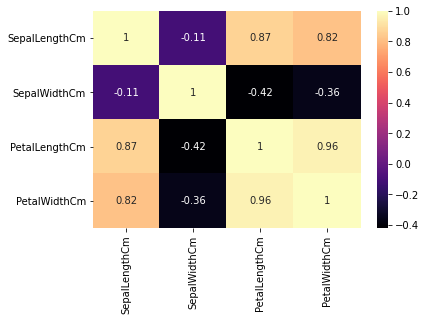

In [17]:
#Visualizing the correlation matrix

ir= iris.corr()
sns.heatmap(ir, annot=True, cmap='magma')


<AxesSubplot:xlabel='Species', ylabel='count'>

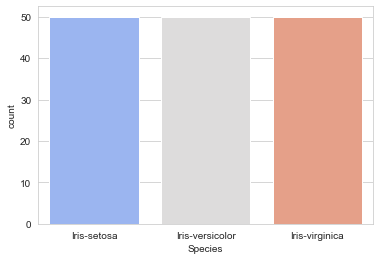

In [18]:
# Visualizing the species column

sns.set_style('whitegrid')
sns.countplot(x='Species', data=iris, palette="coolwarm")

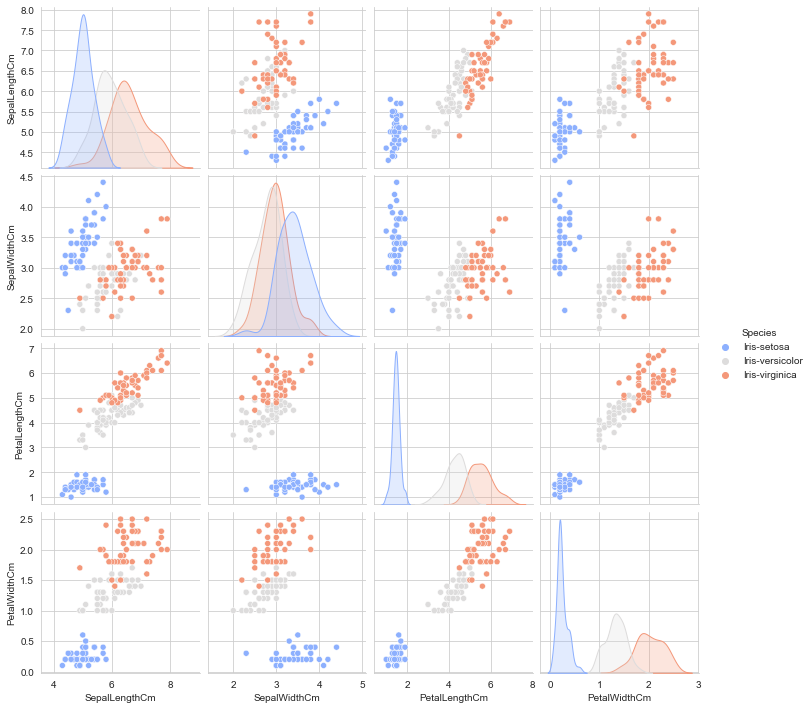

In [19]:
#Visulizing the dataset

sns.pairplot(iris, hue='Species', palette="coolwarm")

In [22]:
# Defining feature(X) and target(y) variables

X= iris.iloc[:,:-1].values
y= iris.iloc[:,-1].values
X.shape, y.shape

((150, 4), (150,))

In [23]:
#Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [24]:
# Importing and training a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred= tree.predict(X_test)

In [39]:
# Calculating the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print ("Confusion matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print ("Accuracy score: {}".format(accuracy_score (y_test, y_pred)))
print("Classification Report: \n {}".format(classification_report(y_test,y_pred)))

Confusion matrix: 
 [[16  0  0]
 [ 0 12  1]
 [ 0  0 16]]
Accuracy score: 0.9777777777777777
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [41]:
#Visualizing the decision tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(iris.columns[1:])
features

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

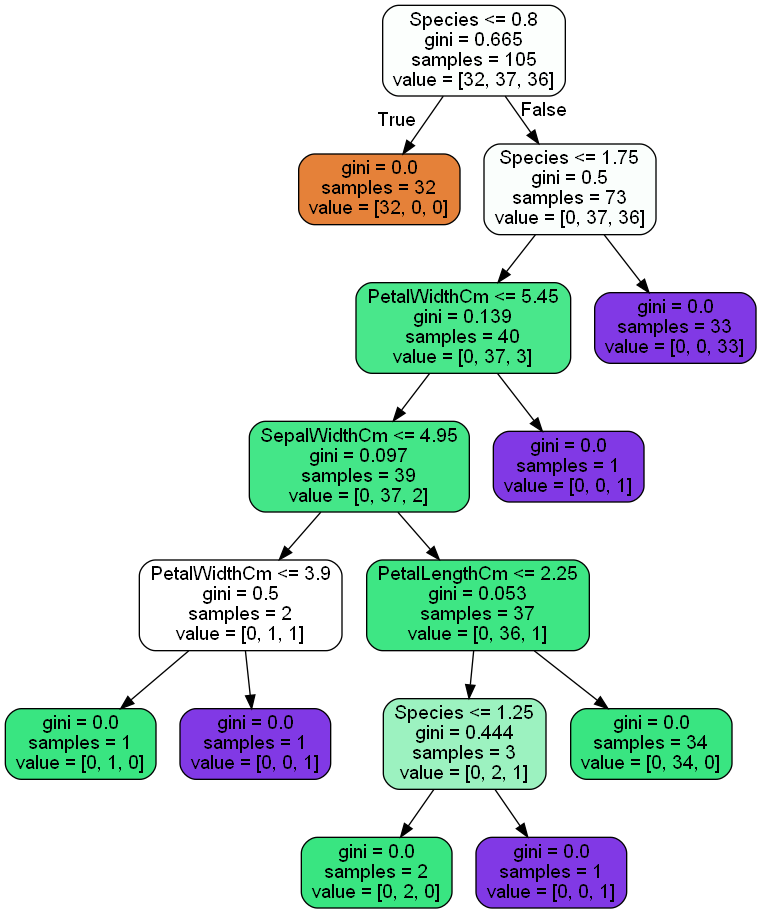

In [38]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Feature importances:
[0.01215066 0.00876831 0.03943409 0.93964695]


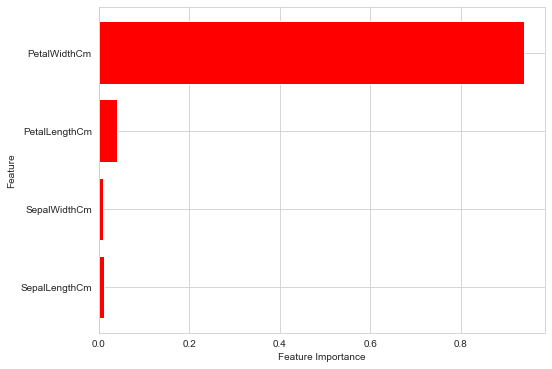

In [28]:
# Calculating and Visualiazing Feature importance in Decision Tree

iris_features= [x for i, x in enumerate(iris.columns)if i!=4]

print("Feature importances:\n{}".format(tree.feature_importances_))
def plot_feature_importances_iris(model):
    plt.figure(figsize=(8,6))
    n_features=4
    plt.barh(range(n_features),model.feature_importances_, align='center', color='red')
    plt.yticks(np.arange(n_features), iris_features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances_iris(tree)

In [29]:
# Importing and applying a Random Forest consisting of 100 trees on the iris data set and calculating the accuracy

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 100)
rf.fit(X_train, y_train)
print ("Accuracy on training set: {}".format(rf.score(X_train, y_train)))
print ("Accuracy on test set: {}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.9333333333333333


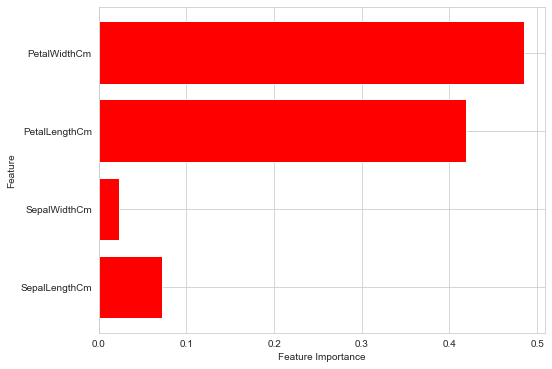

In [30]:
# Visualiazing Feature importance in Random Forest

plot_feature_importances_iris(rf)

In [40]:
# Generating model on selected features(Petal Width and Petal Length) and calculating the accuracy

X= iris[['PetalLengthCm', 'PetalWidthCm']]
y= iris['Species']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

print ("Confusion matrix: \n {}".format(confusion_matrix(y_test, y_pred)))

print ("Accuracy score: {}".format(accuracy_score (y_test, y_pred)))
print("Classification Report: \n {}".format(classification_report(y_test,y_pred)))

Confusion matrix: 
 [[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
Accuracy score: 1.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

